In [1]:
# This Project is based on the popular Used Car Price Prediction Project.
# In this project, I had scrpaed the data of Used Cars from OLX.in for Indore, India (last updated 6th Agust, 2021)
# OLX.in is a popualr marketplace for selling and contacting sellers for used products.

# The dataset used here is scraped directly from OLX.in and the information may not be 100% correct.
# The correctness of the vehicle information depends upon the advertiser(s).

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn import metrics
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format','{:.2f}'.format)

In [3]:
df = pd.read_csv('OLX_Indore.csv')

In [4]:
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
df.head()

,Title,Make,Year,KM,Fuel Type,Price
0,"Mahindra Scorpio S4 Plus, 2017, Diesel",Mahindra,2017,57000,Diesel,951000
1,"Maruti Suzuki S Cross Zeta DDiS 200 SH, 2018, ...",Maruti,2018,37982,Diesel,950000
2,"Renault Fluence E4 D, 2012, Diesel",Renault,2012,99447,Diesel,365000
3,"Toyota Innova Crysta 2.8 ZX AT, 2018, Diesel",Toyota,2018,98000,Diesel,2000000
4,"Maruti Suzuki Alto K10 VXI, 2012, Petrol",Maruti,2012,66500,Petrol,230000


In [6]:
df.describe()

,Year,KM,Price
count,518.00,518.00,518.00
mean,2012.19,66485.66,446507.45
std,5.46,44058.16,392975.67
min,1964.00,0.00,15000.00
25%,2010.00,40375.00,180000.00
50%,2013.00,65000.00,350000.00
75%,2016.00,84000.00,590000.00
max,2021.00,350000.00,3000000.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      518 non-null    object
 1   Make       518 non-null    object
 2   Year       518 non-null    int64 
 3   KM         518 non-null    int64 
 4   Fuel Type  518 non-null    object
 5   Price      518 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 24.4+ KB


In [8]:
df[['KM', 'Price']] = df[['KM', 'Price']].astype('float')

In [9]:
df['Year'] = pd.to_datetime(df.Year, format='%Y').dt.year

In [10]:
df.Make.unique()

array(['Mahindra', 'Maruti', 'Renault', 'Toyota', 'Hyundai', 'Chevrolet',
       'Tata', "Doctor's", 'Honda', 'Ritz', 'Top', 'Excellent', 'Bajaj',
       'Saverlate', 'Mitsubishi', 'Good', 'Alto', 'HYUNDAI', 'Skoda',
       'Ford', 'Kesar', 'Aziz', 'Baleno', 'Toyota,', 'Wagons', 'Datsun',
       'Company', 'Full', 'Sell', 'New', '250000', 'BMW', 'Original',
       'Vitara', 'Volkswagen', 'Power', 'Ganesh', 'Best', 'बजाज',
       'Maximo', 'Almost', 'फुल', '2015', 'Nissan', 'Fiat', 'Safari',
       'White', 'Brand', 'Audi', 'Money', 'मुझे', 'This', 'First',
       'Indigo', 'Urgent', 'A', 'Hiii', 'I10', 'Bicholi', 'Single',
       'Smart', 'Mercedes-Benz', 'Self', 'सिंगल', 'वेष्णौदेविवालेसिक्के',
       'बादशाह', 'car', 'Old', 'कार', 'Opel', 'Tuv', 'Well', 'Aakodiya',
       'Wagenor', 'Kab', 'Royal', 'Insurance', 'Nov', 'Nayi', 'Tavera',
       'Urjent', 'Jeep', 'Ajent', 'Exelent', 'Indica', 'Swift', 'Soda',
       'Second', '1', 'Very', 'seed', 'Fast', 'My', '2008', 'Scorpio',
       

In [11]:
df.Make = df.Make.replace({'Maruti':'Maruti Suzuki',
                             'Swift':'Maruti Suzuki',
                            'Ritz':'Maruti Suzuki',
                            'Baleno':'Maruti Suzuki',
                            'Toyota,':'Toyota',
                            'Alto':'Maruti Suzuki',
                            'बजाज':'Bajaj',
                            'VERNA':'Hyundai',
                            'Safari':'Tata',
                            'Indigo':'Tata',
                            'Tuv':'Mahindra',
                            'I.10':'Hyundai',
                            'Bolero':'Mahindra',
                            'Saverlate':'Chevrolet',
                            'महिन्द्रा':'Mahindra',
                            'Scorpio':'Mahindra',
                            'Vitara':'Maruti Suzuki',
                            'HYUNDAI':'Hyundai',
                            'Wagenor':'Maruti Suzuki',
                            'Tavera':'Chevrolet',
                            })

In [12]:
df_new = df[(df["Make"] == 'Maruti Suzuki') |
            (df["Make"] == 'Toyota') |
            (df["Make"] == 'Bajaj') |
            (df["Make"] == 'Hyundai') |
            (df["Make"] == 'Tata') |
            (df["Make"] == 'Mahindra') |
            (df["Make"] == 'Chevrolet') |
            (df["Make"] == 'Audi') |
            (df["Make"] == 'Hinda') |
            (df["Make"] == 'BMW') |
            (df["Make"] == 'Jeep') |
            (df["Make"] == 'Skoda') |
            (df["Make"] == 'Renault') |
            (df["Make"] == 'Mercedes-Benz') |
            (df["Make"] == 'Volswagen') |
            (df["Make"] == 'Bajaj') |
            (df["Make"] == 'Datsun') |
            (df["Make"] == 'Ford') |
            (df["Make"] == 'Nissan') |
            (df["Make"] == 'Mitsubishi') |
            (df["Make"] == 'Fiat') |
            (df["Make"] == 'Ssangyong') |
            (df["Make"] == 'Eicher') |
            (df["Make"] == 'Opel')
           ]

In [13]:
df_new.head()

,Title,Make,Year,KM,Fuel Type,Price
0,"Mahindra Scorpio S4 Plus, 2017, Diesel",Mahindra,2017,57000.00,Diesel,951000.00
1,"Maruti Suzuki S Cross Zeta DDiS 200 SH, 2018, ...",Maruti Suzuki,2018,37982.00,Diesel,950000.00
2,"Renault Fluence E4 D, 2012, Diesel",Renault,2012,99447.00,Diesel,365000.00
3,"Toyota Innova Crysta 2.8 ZX AT, 2018, Diesel",Toyota,2018,98000.00,Diesel,2000000.00
4,"Maruti Suzuki Alto K10 VXI, 2012, Petrol",Maruti Suzuki,2012,66500.00,Petrol,230000.00


## EDA

#### Title 


In [14]:
df_new.Make.value_counts()

Maruti Suzuki    123
Hyundai           59
Tata              52
Mahindra          48
Chevrolet         27
Toyota            26
Skoda             14
Ford              14
Renault            8
Nissan             5
BMW                4
Fiat               4
Bajaj              3
Audi               3
Mitsubishi         2
Datsun             2
Jeep               1
Opel               1
Mercedes-Benz      1
Name: Make, dtype: int64

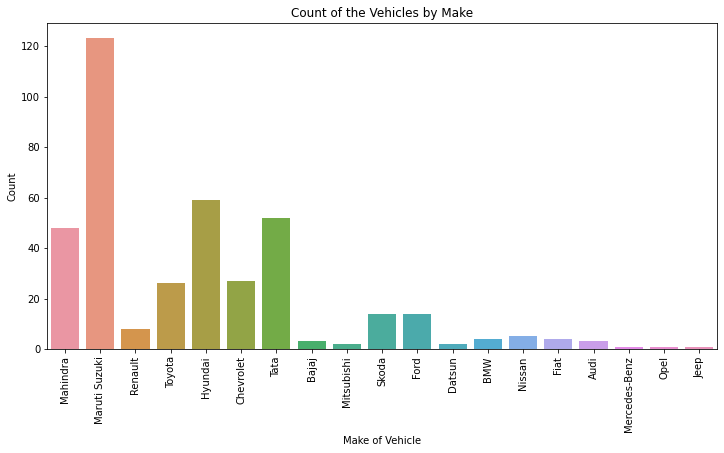

In [15]:
plt.figure(figsize = (12,6))

sns.countplot(df_new['Make'])

plt.title('Count of the Vehicles by Make')
plt.xlabel('Make of Vehicle')
plt.ylabel('Count')
plt.xticks(rotation  = '90')

plt.show()

#### Fuel

In [16]:
df_new['Fuel Type'].value_counts()

Diesel    315
Petrol     82
Name: Fuel Type, dtype: int64

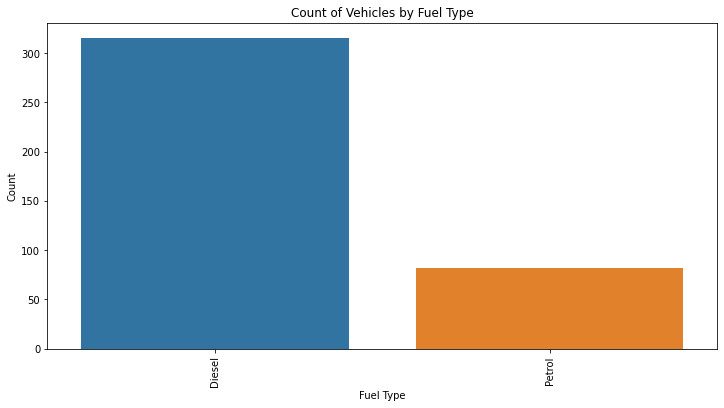

In [17]:
plt.figure(figsize = (12,6))

sns.countplot(df_new['Fuel Type'])

plt.title('Count of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation  = '90')

plt.show()

#### Year

In [18]:
df_new.Year.value_counts()

2012    41
2013    37
2015    33
2011    31
2017    30
2016    28
2018    26
2014    26
2010    23
2019    20
2007    19
2009    18
2008    16
2006    11
2001     6
2000     5
2004     4
2003     4
1998     3
2021     3
2020     3
2005     2
1999     2
1996     2
2002     1
1995     1
1993     1
1964     1
Name: Year, dtype: int64

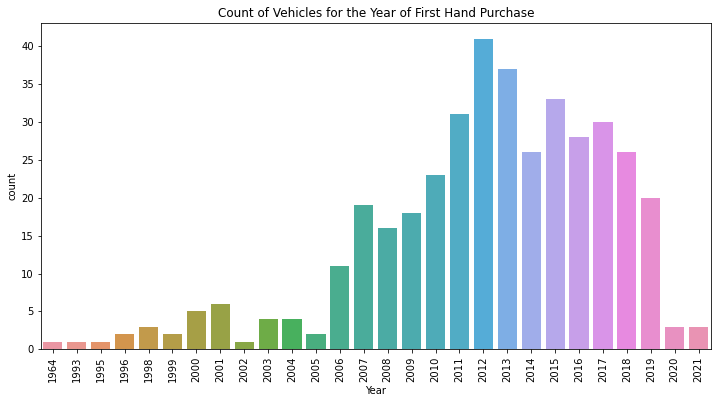

In [19]:
plt.figure(figsize = (12,6))

sns.countplot(df_new['Year'])

plt.title('Count of Vehicles for the Year of First Hand Purchase')
plt.xlabel('Year')
plt.xticks(rotation  = '90')

plt.show()

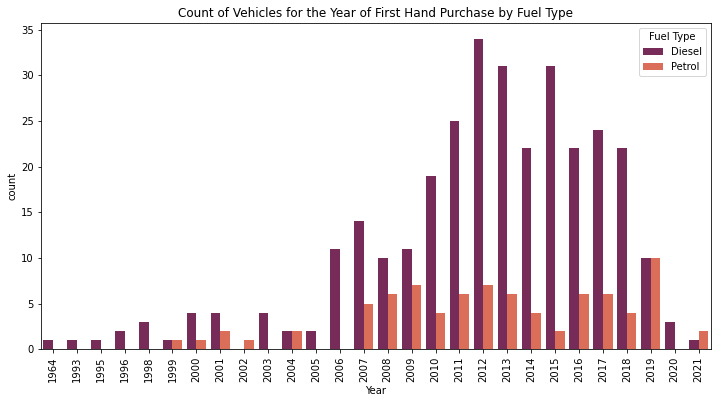

In [20]:
plt.figure(figsize = (12,6))

sns.countplot(df_new['Year'], hue=  df_new['Fuel Type'], palette='rocket')
plt.title('Count of Vehicles for the Year of First Hand Purchase by Fuel Type')
plt.xlabel('Year')
plt.ylabel('count')
plt.xticks(rotation  = '90')

plt.show()

#### KM

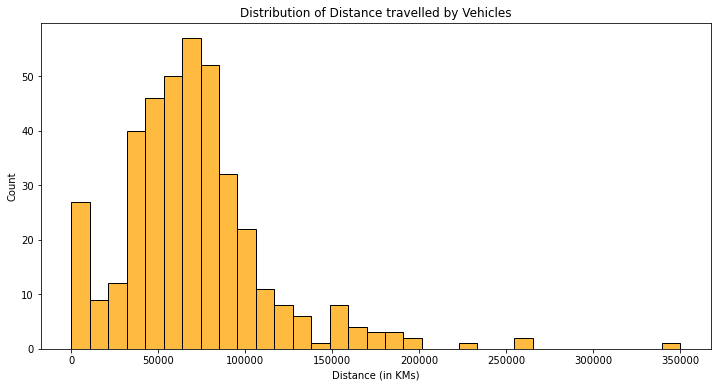

In [21]:
plt.figure(figsize = (12,6))

sns.histplot(df_new['KM'], color = 'Orange')
plt.title('Distribution of Distance travelled by Vehicles')
plt.xlabel('Distance (in KMs)')
plt.ylabel('Count')

plt.show()

In [22]:
# Most of the Vehicles had travelled 50,000 to 1,00,000 KMs

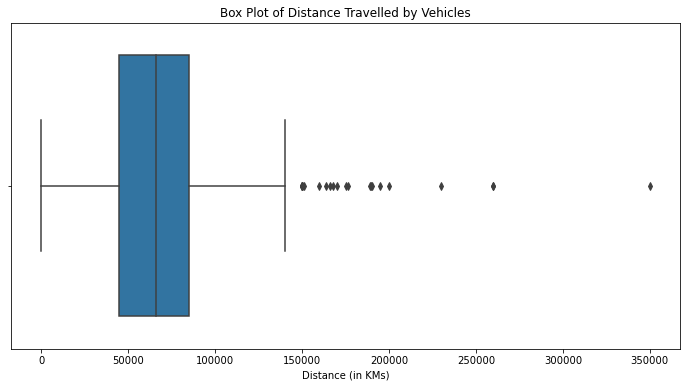

In [23]:
plt.figure(figsize = (12,6))

sns.boxplot(df_new['KM'])
plt.title('Box Plot of Distance Travelled by Vehicles')
plt.xlabel('Distance (in KMs)')

plt.show()

### Outlier Analysis

In [24]:
df_new.describe()

,Year,KM,Price
count,397.00,397.00,397.00
mean,2012.10,70322.84,462029.66
std,5.51,42449.55,399187.15
min,1964.00,0.00,15000.00
25%,2010.00,45000.00,185000.00
50%,2013.00,66200.00,350000.00
75%,2016.00,85000.00,611000.00
max,2021.00,350000.00,2500000.00


In [25]:
# Removing top 1% records based on KM to avoid outliers.

In [26]:
np.quantile(df_new['KM'], 0.99)

201200.0000000006

In [27]:
df_no_ot = df_new[df_new['KM'] < np.quantile(df_new['KM'], 0.99)]

In [28]:
df_no_ot.describe()

,Year,KM,Price
count,393.00,393.00,393.00
mean,2012.11,68239.87,464073.22
std,5.53,36985.92,400424.32
min,1964.00,0.00,15000.00
25%,2010.00,45000.00,190000.00
50%,2013.00,65870.00,350000.00
75%,2016.00,85000.00,611000.00
max,2021.00,200000.00,2500000.00


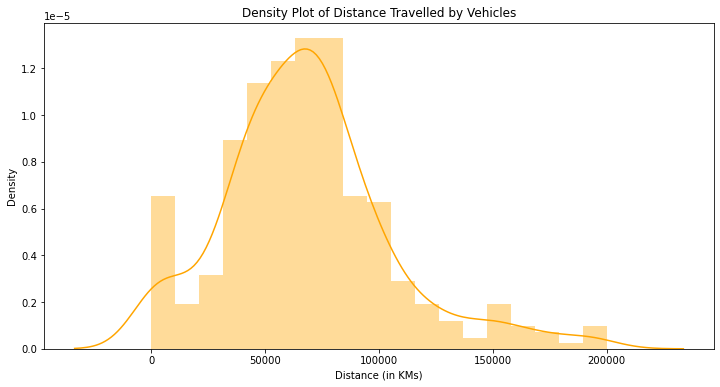

In [29]:
plt.figure(figsize = (12,6))

sns.distplot(df_no_ot['KM'], color = 'Orange')
plt.title('Density Plot of Distance Travelled by Vehicles')
plt.xlabel('Distance (in KMs)')

plt.show()

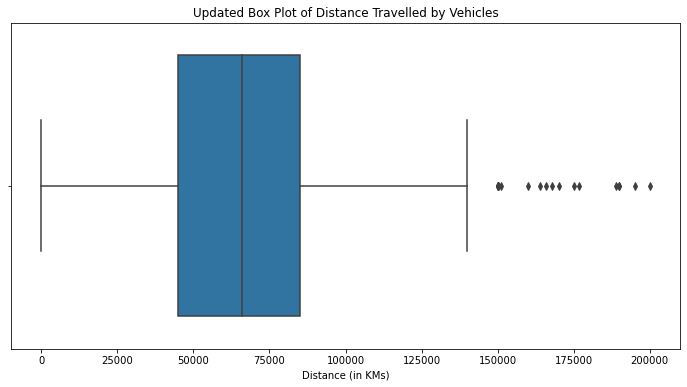

In [30]:
plt.figure(figsize = (12,6))

sns.boxplot(df_no_ot['KM'])
plt.title('Updated Box Plot of Distance Travelled by Vehicles')
plt.xlabel('Distance (in KMs)')

plt.show()

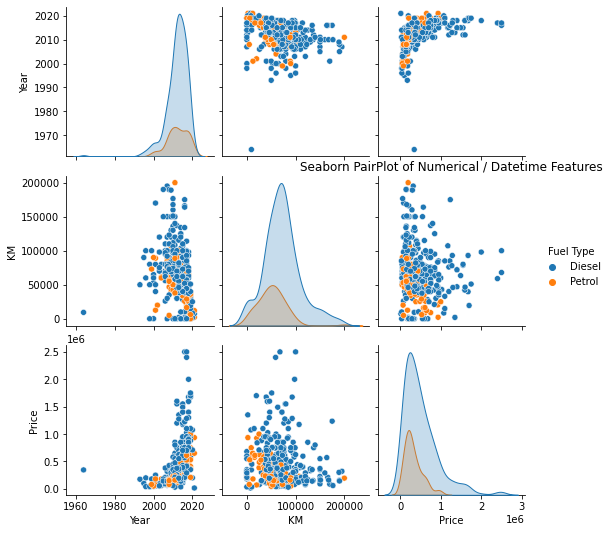

In [31]:
sns.pairplot(df_no_ot, hue = 'Fuel Type')
plt.title('Seaborn PairPlot of Numerical / Datetime Features')
plt.xlabel('Features')

plt.show()

#### Dummies for Categorical Features

In [32]:
X = df_no_ot[['Make', 'Year', 'KM', 'Fuel Type']]
y = df_no_ot['Price']

In [33]:
x = pd.get_dummies(X, drop_first = True)

#### Train Test Split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 66)

### Linear Regression

In [35]:
linreg = LinearRegression()

In [36]:
linreg.fit(x_train, y_train)

LinearRegression()

In [37]:
np.round(np.sqrt(metrics.mean_squared_error(y_train, linreg.predict(x_train))),3)

262839.138

In [38]:
np.round(np.sqrt(metrics.mean_squared_error(y_test, linreg.predict(x_test))),3)

373217.674

In [39]:
np.round(metrics.r2_score(y_train, linreg.predict(x_train)), 2)

0.51

### Lasso

In [40]:
lasso = Lasso(max_iter=15000)

In [41]:
lasso.fit(x_train, y_train)

Lasso(max_iter=15000)

In [42]:
np.round(np.sqrt(metrics.mean_squared_error(y_train, lasso.predict(x_train))),3)

262839.274

In [43]:
np.round(np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(x_test))),3)

373014.505

In [44]:
np.round(metrics.r2_score(y_train, lasso.predict(x_train)), 2)

0.51

### Ridge

In [45]:
ridge = Ridge(max_iter = 1500)

In [46]:
ridge.fit(x_train, y_train)

Ridge(max_iter=1500)

In [47]:
np.round(np.sqrt(metrics.mean_squared_error(y_train, ridge.predict(x_train))),3)

270423.858

In [48]:
np.round(np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(x_test))),3)

372726.876

In [49]:
np.round(metrics.r2_score(y_train, ridge.predict(x_train)) , 2)

0.48

### ElasticNet

In [50]:
enet = ElasticNet(max_iter = 1500)

In [51]:
enet.fit(x_train, y_train)

ElasticNet(max_iter=1500)

In [52]:
np.round(np.sqrt(metrics.mean_squared_error(y_train, enet.predict(x_train))),3)

298837.951

In [53]:
np.round(np.sqrt(metrics.mean_squared_error(y_test, enet.predict(x_test))),3)

397702.368

In [54]:
np.round(metrics.r2_score(y_train, enet.predict(x_train)),2)

0.37

### OLS

In [55]:
x_train_ols = sm.add_constant(x_train)

In [56]:
model = sm.OLS(y_train, x_train_ols)

In [57]:
results = model.fit()

In [58]:
print(results.summary2())

                              Results: Ordinary least squares
Model:                       OLS                      Adj. R-squared:             0.476     
Dependent Variable:          Price                    AIC:                        7684.0298 
Date:                        2021-08-06 21:22         BIC:                        7756.3652 
No. Observations:            275                      Log-Likelihood:             -3822.0   
Df Model:                    19                       F-statistic:                14.11     
Df Residuals:                255                      Prob (F-statistic):         5.46e-30  
R-squared:                   0.512                    Scale:                      7.4503e+10
--------------------------------------------------------------------------------------------
                       Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
--------------------------------------------------------------------------------------------
const   

In [59]:
# Removing 'Make_Mercedes-Benz' as it has p-value > 0.05

In [60]:
x_train_ols_2 = x_train_ols.drop('Make_Mercedes-Benz', axis = 1)

In [61]:
model2 = sm.OLS(y_train, x_train_ols_2)

In [62]:
results2 = model2.fit()

In [63]:
print(results2.summary2())

                              Results: Ordinary least squares
Model:                       OLS                      Adj. R-squared:             0.472     
Dependent Variable:          Price                    AIC:                        7685.2683 
Date:                        2021-08-06 21:22         BIC:                        7753.9869 
No. Observations:            275                      Log-Likelihood:             -3823.6   
Df Model:                    18                       F-statistic:                14.61     
Df Residuals:                256                      Prob (F-statistic):         5.72e-30  
R-squared:                   0.507                    Scale:                      7.5091e+10
--------------------------------------------------------------------------------------------
                       Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
--------------------------------------------------------------------------------------------
const   

In [64]:
# Regression Models after Removing 'Make_Mercedes-Benz' Feature.

In [65]:
x_2 = x.drop('Make_Mercedes-Benz', axis = 1)

In [66]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y, test_size=0.3, random_state=66)

In [67]:
linreg2 = LinearRegression()
linreg2.fit(x_train_2, y_train_2)
print(np.round(np.sqrt(metrics.mean_squared_error(y_train_2, linreg2.predict(x_train_2))),3))
print(np.round(np.sqrt(metrics.mean_squared_error(y_test_2, linreg2.predict(x_test_2))),3))
print(np.round(metrics.r2_score(y_train_2, linreg2.predict(x_train_2)), 2))

264391.331
362733.379
0.51


In [68]:
lasso2 = Lasso()
lasso2.fit(x_train_2, y_train_2)
print(np.round(np.sqrt(metrics.mean_squared_error(y_train_2, lasso2.predict(x_train_2))),3))
print(np.round(np.sqrt(metrics.mean_squared_error(y_test_2, lasso2.predict(x_test_2))),3))
print(np.round(metrics.r2_score(y_train_2, lasso2.predict(x_train_2)), 2))

264391.391
362699.505
0.51


In [69]:
ridge2 = Ridge()
ridge2.fit(x_train_2, y_train_2)
print(np.round(np.sqrt(metrics.mean_squared_error(y_train_2, ridge2.predict(x_train_2))),3))
print(np.round(np.sqrt(metrics.mean_squared_error(y_test_2, ridge2.predict(x_test_2))),3))
print(np.round(metrics.r2_score(y_train_2, ridge2.predict(x_train_2)), 2))

270809.559
372194.005
0.48


In [70]:
enet2 = ElasticNet()
enet2.fit(x_train_2, y_train_2)
print(np.round(np.sqrt(metrics.mean_squared_error(y_train_2, enet2.predict(x_train_2))),3))
print(np.round(np.sqrt(metrics.mean_squared_error(y_test_2, enet2.predict(x_test_2))),3))
print(np.round(metrics.r2_score(y_train_2, enet2.predict(x_train_2)), 2))

298854.109
397699.154
0.37


In [71]:
# Models performed bad after Removign the 'Make_Mercedes-Benz' Feature.